# Diseño de Filtros FIR (por Ventanas)

## Conceptos Clave

Según la Clase 15[cite: 1], los filtros FIR (Finite Impulse Response) se caracterizan por tener una respuesta al impulso $h(n)$ que se extiende solo sobre un intervalo de tiempo finito[cite: 1]. Un método común para diseñar filtros FIR con una respuesta en frecuencia deseada $D(\omega)$ es el **método de las ventanas**[cite: 1].

El proceso generalmente sigue estos pasos:
1.  **Obtener la respuesta al impulso ideal** $d(n)$ tomando la Transformada Inversa de Fourier (analítica) de la respuesta en frecuencia deseada $D(\omega)$. Para un filtro pasabajos ideal con frecuencia de corte $\omega_c$, la respuesta al impulso ideal es:
    $$d(n) = \frac{\sin(\omega_c n)}{\pi n}$$
    donde $d(0) = \omega_c / \pi$. Esta respuesta ideal es generalmente de duración infinita y no causal.

2.  **Seleccionar una función ventana** $w(n)$ de duración finita (por ejemplo, rectangular, Hamming, Hanning, Blackman, etc.)[cite: 1]. La ventana tiene longitud $N$ y a menudo es simétrica alrededor de $n=0$ o $n=(N-1)/2$.

3.  **Multiplicar la respuesta al impulso ideal por la ventana** para obtener la respuesta al impulso del filtro FIR diseñado $h(n)$:
    $$h(n) = d(n) w(n)$$
    Esta operación trunca la respuesta ideal a una duración finita.

4.  **Hacer el filtro causal** desplazando la respuesta al impulso: $h_{causal}(n) = h(n - (N-1)/2)$ (para ventanas simétricas de longitud $N$).

En el dominio de la frecuencia, la multiplicación en el tiempo $h(n) = d(n) w(n)$ corresponde a la **convolución** de sus respectivas Transformadas de Fourier $D(\omega)$ y $W(\omega)$[cite: 1]:
$$H(\omega) = \frac{1}{2\pi} (D * W)(\omega)$$
La forma de la respuesta en frecuencia de la ventana $W(\omega)$ (ancho del lóbulo principal, nivel de los lóbulos laterales) determina las características del filtro diseñado $H(\omega)$ (ancho de la banda de transición, rizado en banda pasante y banda de rechazo).

<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\p'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maxim\AppData\Local\Temp\ipykernel_25508\2199636385.py:52: SyntaxWarning: invalid escape sequence '\o'
  axes[0].set_title(f'Respuesta al Impulso Ideal $d(n)$ ($\omega_c = {omega_c/np.pi:.2f}\pi$)')
C:\Users\maxim\AppData\Local\Temp\ipykernel_25508\2199636385.py:52: SyntaxWarning: invalid escape sequence '\p'
  axes[0].set_title(f'Respuesta al Impulso Ideal $d(n)$ ($\omega_c = {omega_c/np.pi:.2f}\pi$)')


--- Ejemplo 1: Diseño Básico de Filtro Pasabajos por Ventaneo ---
Frecuencia de corte ideal (wc): 0.30 * pi
Longitud del filtro (N): 41


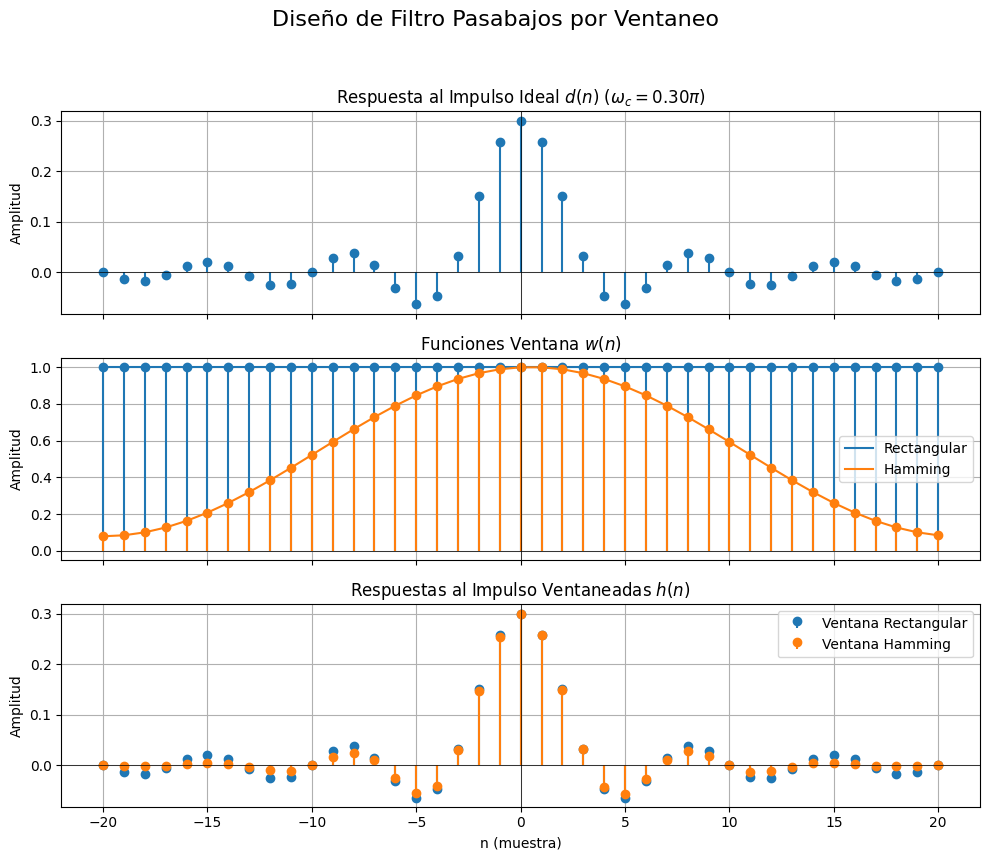


--- Fin del Ejemplo 1 ---



In [1]:
# --------------- Imports ---------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
import math

# --- Ejemplo 1: Diseño Básico por Ventaneo ---
print("--- Ejemplo 1: Diseño Básico de Filtro Pasabajos por Ventaneo ---")

# Parámetros del filtro
omega_c = 0.3 * np.pi # Frecuencia de corte (radianes/muestra)
N = 41               # Longitud del filtro (número impar para ventana simétrica centrada)
M = N - 1            # Orden del filtro

# Rango de n para visualizar la respuesta ideal (simétrica alrededor de 0)
n_ideal = np.arange(-(M//2), M//2 + 1) # Centrado en 0

# --- Calcular la respuesta al impulso ideal d(n) ---
# Inicializar d(n)
d_n = np.zeros(N)

# Calcular d(n) usando la fórmula sin(wc*n)/(pi*n)
for i, n_val in enumerate(n_ideal):
    if n_val == 0:
        d_n[i] = omega_c / np.pi # Valor en n=0
    else:
        d_n[i] = np.sin(omega_c * n_val) / (np.pi * n_val)

print(f"Frecuencia de corte ideal (wc): {omega_c/np.pi:.2f} * pi")
print(f"Longitud del filtro (N): {N}")

# --- Crear funciones ventana ---
# Ventana Rectangular
w_rect = get_window('boxcar', N) # 'boxcar' es sinónimo de rectangular

# Ventana de Hamming
w_hamming = get_window('hamming', N)

# --- Aplicar las ventanas a la respuesta ideal ---
h_rect = d_n * w_rect    # Respuesta al impulso con ventana rectangular
h_hamming = d_n * w_hamming # Respuesta al impulso con ventana de Hamming

# Nota: Para la implementación causal, estos coeficientes h(n) se usarían
# en la convolución y el retardo sería (N-1)/2. Aquí los visualizamos centrados en 0.

# --- Visualización ---
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)
fig.suptitle('Diseño de Filtro Pasabajos por Ventaneo', fontsize=16)

# Plot 1: Respuesta al Impulso Ideal d(n)
axes[0].stem(n_ideal, d_n, basefmt=" ")
axes[0].set_title(f'Respuesta al Impulso Ideal $d(n)$ ($\omega_c = {omega_c/np.pi:.2f}\pi$)')
axes[0].set_ylabel('Amplitud')
axes[0].grid(True)
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].axvline(0, color='black', linewidth=0.5)

# Plot 2: Funciones Ventana w(n)
axes[1].plot(n_ideal, w_rect, label='Rectangular')
axes[1].plot(n_ideal, w_hamming, label='Hamming')
axes[1].stem(n_ideal, w_rect, basefmt=" ", markerfmt='C0o', linefmt='C0-') # Mostrar puntos para Rectangular
axes[1].stem(n_ideal, w_hamming, basefmt=" ", markerfmt='C1o', linefmt='C1-') # Mostrar puntos para Hamming
axes[1].set_title('Funciones Ventana $w(n)$')
axes[1].set_ylabel('Amplitud')
axes[1].legend()
axes[1].grid(True)
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].axvline(0, color='black', linewidth=0.5)


# Plot 3: Respuestas al Impulso Ventaneadas h(n)
axes[2].stem(n_ideal, h_rect, basefmt=" ", label='Ventana Rectangular', markerfmt='C0o', linefmt='C0-')
axes[2].stem(n_ideal, h_hamming, basefmt=" ", label='Ventana Hamming', markerfmt='C1o', linefmt='C1-')
axes[2].set_title('Respuestas al Impulso Ventaneadas $h(n)$')
axes[2].set_xlabel('n (muestra)')
axes[2].set_ylabel('Amplitud')
axes[2].legend()
axes[2].grid(True)
axes[2].axhline(0, color='black', linewidth=0.5)
axes[2].axvline(0, color='black', linewidth=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout
plt.show()

print("\n--- Fin del Ejemplo 1 ---\n")

## Ejemplo Extra: Visualización Interactiva de la Respuesta en Frecuencia de Filtros FIR Diseñados por Ventanas

Este ejemplo interactivo te permite explorar cómo la elección de la función ventana y la longitud del filtro ($N$) afectan la respuesta en frecuencia de un filtro pasabajos FIR diseñado mediante el método de las ventanas.

Puedes ajustar:
* El tipo de ventana.
* La longitud del filtro ($N$).
* La frecuencia de corte ideal ($\omega_c$).

Observa cómo los diferentes tipos de ventana presentan distintas características en su respuesta en frecuencia (lóbulo principal vs. lóbulos laterales), y cómo esto se traslada a la respuesta en frecuencia del filtro diseñado en términos de:
* **Ancho de la banda de transición:** Qué tan rápido pasa el filtro de la banda pasante a la banda de rechazo.
* **Rizado en banda pasante y banda de rechazo:** Las oscilaciones en las regiones donde la magnitud ideal debería ser constante (1 en banda pasante, 0 en banda de rechazo).

La respuesta en frecuencia de un filtro ventaneado es la convolución de la respuesta ideal y la respuesta de la ventana. Un lóbulo principal más estrecho en la ventana resulta en una banda de transición más estrecha en el filtro. Lóbulos laterales más bajos en la ventana resultan en menor rizado en la banda de rechazo del filtro.

In [ ]:
# --------------- Imports ---------------
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import IntSlider, FloatSlider, Dropdown, VBox, interactive_output, Layout
from IPython.display import display, clear_output
from scipy.signal import get_window, freqz
import math

# --- Función para diseñar el filtro FIR y calcular su respuesta en frecuencia ---

def design_and_plot_fir(window_type, N, omega_c_norm):
    """
    Diseña un filtro pasabajos FIR usando el método de ventanas y grafica h(n) y |H(omega)|.
    omega_c_norm es la frecuencia de corte normalizada entre 0 y 0.5 (correspondiente a 0 a pi).
    """
    # Limpiar la salida anterior
    with output_area:
        clear_output(wait=True)

    # Convertir frecuencia de corte normalizada a radianes/muestra (0 a pi)
    omega_c = omega_c_norm * np.pi

    print(f"--- Diseño FIR: Ventana '{window_type}', N = {N}, ωc = {omega_c_norm:.2f}π ---")

    # Asegurar que N sea al menos 2 para ventanas y cálculos
    if N < 2:
        print("Error: N debe ser al menos 2. Ajustando N a 2.")
        N = 2 # Usar un valor mínimo para evitar errores

    M = N - 1 # Orden del filtro

    # --- Correcto rango de n para la respuesta al impulso ideal (centrado en 0) ---
    # Los índices van desde -(N-1)//2 hasta (N-1)//2 para tener N puntos.
    n_indices_centered = np.arange(-(N-1)//2, (N-1)//2 + 1)


    # --- Calcular la respuesta al impulso ideal d(n) ---
    d_n = np.zeros(N)
    # Iterar a través de los índices centrados para calcular d(n)
    for i, n_val in enumerate(n_indices_centered):
        if n_val == 0:
            d_n[i] = omega_c / np.pi # Valor en n=0
        else:
            d_n[i] = np.sin(omega_c * n_val) / (np.pi * n_val)

    # --- Crear la función ventana ---
    # get_window retorna la ventana para índices de 0 a N-1
    window = get_window(window_type, N)

    # --- Aplicar la ventana ---
    # Esta multiplicación elemento a elemento alinea conceptualmente la ventana (índices 0 a N-1)
    # con los valores de d_n que calculamos (correspondientes a n_indices_centered).
    # h_n sigue teniendo N puntos.
    h_n = d_n * window

    # --- Calcular la respuesta en frecuencia |H(omega)| ---
    # Usamos scipy.signal.freqz para obtener la respuesta en frecuencia digital
    # freqz opera en la secuencia h_n de longitud N.
    # El vector omega resultante de freqz tiene longitud worN y va de 0 a pi.
    omega, H = freqz(h_n, [1], worN=2048)
    H_mag = np.abs(H)
    H_db = 20 * np.log10(H_mag + 1e-9) # Magnitud en dB, añadiendo un pequeño valor para evitar log(0)


    # --- Creación de Subplots ---
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(f'Filtro FIR Pasabajos (Ventana: {window_type}, N = {N}, $\omega_c = {omega_c_norm:.2f}\pi$)', fontsize=14)

    # Plot 1: Respuesta al Impulso h(n) (no causal, centrado en 0)
    # Graficar h_n (N puntos) contra los índices centrados (N puntos)
    axes[0].stem(n_indices_centered, h_n, basefmt=" ")
    axes[0].set_title('Respuesta al Impulso $h(n)$ (Centrada en 0)')
    axes[0].set_xlabel("n (muestra)")
    axes[0].set_ylabel("Amplitud")
    axes[0].grid(True)
    axes[0].axhline(0, color='black', linewidth=0.5)
    axes[0].axvline(0, color='black', linewidth=0.5)


    # Plot 2: Magnitud de la Respuesta en Frecuencia |H(omega)|
    # El vector omega de freqz va de 0 a pi, que corresponde a 0 a 0.5 en frecuencia normalizada fs/2
    axes[1].plot(omega / np.pi, H_db) # Graficar en frecuencia normalizada (0 a 1, donde 1 es fs)
    axes[1].set_title('Magnitud de la Respuesta en Frecuencia $|H(\omega)|$')
    axes[1].set_xlabel("Frecuencia normalizada ($\times \pi$ rad/muestra)")
    axes[1].set_ylabel("Magnitud (dB)")
    axes[1].set_xlim(0, 1) # Mostrar de 0 a fs/2 (correspondiente a 0 a pi en omega)
    axes[1].set_ylim(-100, 5) # Rango típico para magnitud en dB
    axes[1].axvline(omega_c / np.pi, color='red', linestyle='--', label=f'$\omega_c = {omega_c_norm:.2f}\pi$') # Mostrar frecuencia de corte
    axes[1].legend()
    axes[1].grid(True)


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout

    # Mostrar el gráfico dentro del contexto del output_area
    with output_area:
        plt.show()

    print("\n--- Fin del Gráfico ---")


# --- Widgets de Control ---
style = {'description_width': 'initial'}
layout_widget = Layout(width='80%')

window_dropdown = Dropdown(
    options=['boxcar', 'hamming', 'hann', 'blackman'], # Tipos de ventana comunes en scipy
    value='hamming', # Valor por defecto
    description='Tipo de Ventana:',
    style=style,
    layout=layout_widget
)

N_slider = IntSlider(
    min=11, max=201, step=10, value=41, # Longitud del filtro impar (N=M+1)
    description='Longitud del Filtro (N):',
    style=style,
    layout=layout_widget
)

omega_c_slider = FloatSlider(
    min=0.05, max=0.95, step=0.05, value=0.3, # Frecuencia de corte normalizada (0 a 0.5pi => 0 a 0.95*pi)
    description='Frec. de Corte ($\\omega_c / \pi$):',
    style=style,
    layout=layout_widget,
    readout_format=".2f"
)


# --- Contenedor de Salida ---
output_area = widgets.Output()

# --- Conectar Widgets y Mostrar ---
interactive_plot = interactive_output(
    design_and_plot_fir,
    {'window_type': window_dropdown, 'N': N_slider, 'omega_c_norm': omega_c_slider}
)

print("Ajusta los controles para diseñar y visualizar la respuesta de un filtro FIR Pasabajos:")

display(VBox([window_dropdown, N_slider, omega_c_slider, output_area]))

# Ejecutar la función inicialmente para mostrar el estado por defecto
with output_area:
     design_and_plot_fir(window_dropdown.value, N_slider.value, omega_c_slider.value)

print("\n--- Fin del Código Interactivo ---\n")

<>:68: SyntaxWarning: invalid escape sequence '\o'
<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:84: SyntaxWarning: invalid escape sequence '\o'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:89: SyntaxWarning: invalid escape sequence '\o'
<>:89: SyntaxWarning: invalid escape sequence '\p'
<>:124: SyntaxWarning: invalid escape sequence '\p'
<>:68: SyntaxWarning: invalid escape sequence '\o'
<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:84: SyntaxWarning: invalid escape sequence '\o'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:89: SyntaxWarning: invalid escape sequence '\o'
<>:89: SyntaxWarning: invalid escape sequence '\p'
<>:124: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maxim\AppData\Local\Temp\ipykernel_25508\3285967149.py:68: SyntaxWarning: invalid escape sequence '\o'
  fig.suptitle(f'Filtro FIR Pasabajos (Ventana: {window_type}, N = {N}, $\omega_c = {omega_c_norm:.2f}\pi$)', fontsize=14)
C:\Users\maxim\AppData\Local\Temp\ipykernel_25508

Ajusta los controles para diseñar y visualizar la respuesta de un filtro FIR Pasabajos:



--- Fin del Código Interactivo ---

